<a href="https://colab.research.google.com/github/mkinfe/privacy/blob/main/DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset and display the summary of its structure

In [1]:
!pip uninstall tensorflow tensorflow-privacy -y
!pip install tensorflow==2.14.0 tensorflow-probability
!pip install tensorflow-privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer


import pandas as pd

# Load the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)

# Explore the dataset
# TODO: Display the first few rows and summary statistics of the dataset
data.head()

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data analysis to understand the distribution of the features:

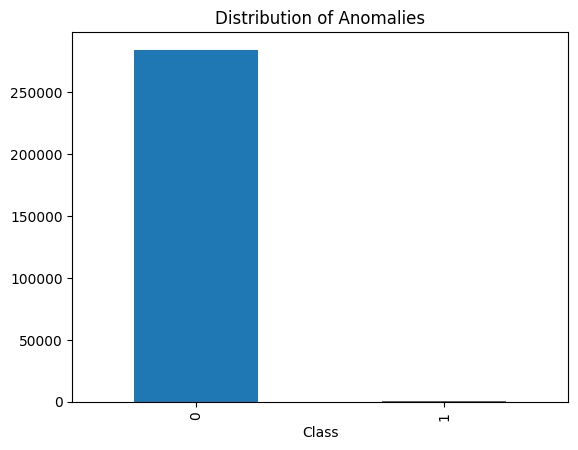

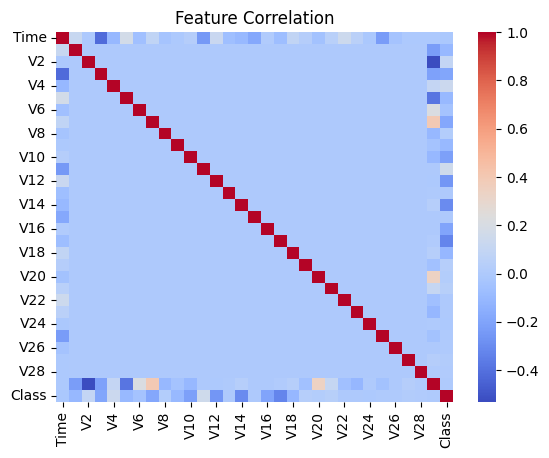

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of anomalies (fraudulent transactions)
counts = data['Class'].value_counts()
counts.plot(kind='bar', title='Distribution of Anomalies')
plt.show()

# Optional: Correlation heatmap

# TODO: Generate a heatmap for feature correlations
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()

Split the data in to training and test

In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data
# TODO: Complete the train_test_split function call
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Building anomaly detection Pipeline

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # TODO: Complete this step
    ("model", IsolationForest(contamination=0.01, random_state=42))  # Define contamination as per the data
])

# Train the model
pipeline.fit(X_train)

# Predict anomalies
# TODO: Apply the model to X_test and adjust predictions for comparison
y_pred = pipeline.named_steps["model"].predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Evaluate the model:

In [5]:
from sklearn.metrics import classification_report, roc_auc_score

# Adjust predictions
y_pred = (y_pred == -1).astype(int)

# Evaluate the model
# Print the classification report and ROC-AUC score
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.08      0.68      0.14       148

    accuracy                           0.99     85443
   macro avg       0.54      0.83      0.57     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC Score: 0.8342111162689744


Visualize the result:


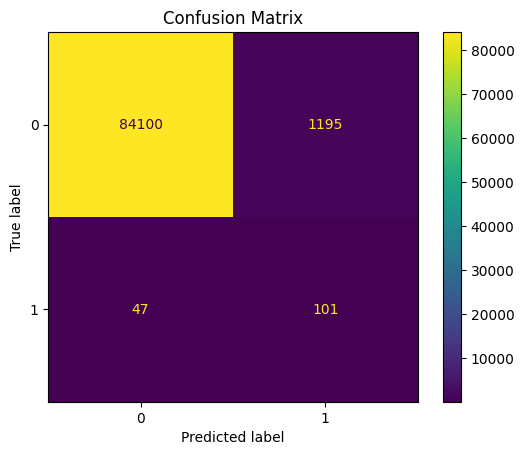

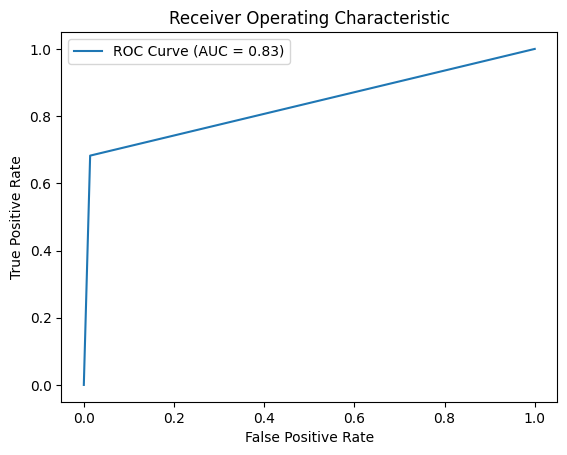

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()


Laplace Mechanism: How many fraudulent transactions occurred?

In [7]:
import numpy as np

# Laplace Mechanism for Count Query
def laplace_mechanism_count(original_value, epsilon=1.0, sensitivity=1.0):
    noise = np.random.laplace(0, sensitivity / epsilon)
    return original_value + noise

# Example: DP count of fraudulent transactions
fraud_count = len(y_train[y_train == 1])
dp_fraud_count = laplace_mechanism_count(fraud_count, epsilon=0.5)
print(f"Original Fraud Count: {fraud_count}, DP Fraud Count (epsilon=0.5): {dp_fraud_count}")


Original Fraud Count: 344, DP Fraud Count (epsilon=0.5): 341.8365372295993


PRIVATE MODEL TRAINING WITH DP-SGD

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import classification_report
# Define model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Define optimizer with differential privacy
optimizer = DPKerasSGDOptimizer(
    l2_norm_clip=1.0,
    noise_multiplier=1.1,
    num_microbatches=1,
    learning_rate=0.01
)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate
dp_predictions = model.predict(X_test).round().astype(int)
print(classification_report(y_test, dp_predictions))


Epoch 1/5
6231/6231 [==============================] - 20s 3ms/step - loss: 249.6851 - accuracy: 0.9449
Epoch 2/5
6231/6231 [==============================] - 19s 3ms/step - loss: 491.7074 - accuracy: 0.9578
Epoch 3/5
6231/6231 [==============================] - 18s 3ms/step - loss: 760.8770 - accuracy: 0.9659
Epoch 4/5
6231/6231 [==============================] - 19s 3ms/step - loss: 433.8906 - accuracy: 0.9545
Epoch 5/5
2671/2671 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



Epoch 1/5
4984/4984 [==============================] - 32s 6ms/step - loss: 1.9318 - accuracy: 0.9979 - val_loss: 1.5147 - val_accuracy: 0.9981
Epoch 2/5
4984/4984 [==============================] - 30s 6ms/step - loss: 1.2062 - accuracy: 0.9983 - val_loss: 1.4049 - val_accuracy: 0.9980
Epoch 3/5
4984/4984 [==============================] - 32s 6ms/step - loss: 1.3458 - accuracy: 0.9983 - val_loss: 1.2874 - val_accuracy: 0.9981
Epoch 4/5
4984/4984 [==============================] - 31s 6ms/step - loss: 1.2152 - accuracy: 0.9983 - val_loss: 1.0776 - val_accuracy: 0.9981
Epoch 5/5
2671/2671 [==============================] - 4s 1ms/step
Classification Report with DP-SGD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


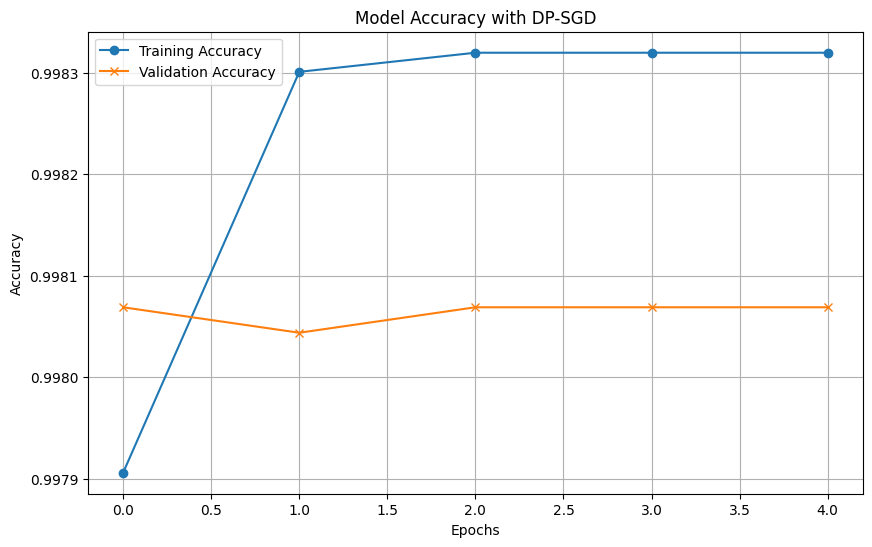

In [18]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer

# Hyperparameters
l2_norm_clip = 1.0
noise_multiplier = 1.1
batch_size = 32
num_microbatches = batch_size  # Match num_microbatches to batch_size
learning_rate = 0.01

# Adjust training data size
train_size = (len(X_train) // batch_size) * batch_size
X_train = X_train[:train_size]
y_train = y_train[:train_size]

# DP Optimizer
optimizer = DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with the correct loss reduction
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=batch_size,
    validation_split=0.2
)

# Evaluate the model
dp_predictions = (model.predict(X_test) > 0.5).astype(int)
print("Classification Report with DP-SGD:")
print(classification_report(y_test, dp_predictions))

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy with DP-SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# =========================
# Data Preparation
# =========================
X = data.drop('Class', axis=1)
y = data['Class']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# Model Definition
# =========================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define Differential Privacy (DP-SGD) optimizer
noise_multiplier = 1.1  # Adjust noise level for differential privacy
l2_norm_clip = 1.0  # Clipping threshold
num_microbatches = 64  # Must divide batch_size
learning_rate = 0.01

optimizer = DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Using default binary_crossentropy
              metrics=['accuracy'])

# =========================
# Training
# =========================
batch_size = 32  # Try with a smaller batch size (divisible by num_microbatches)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=5,
    shuffle=True  # Adding shuffle to improve data distribution
)

# =========================
# Evaluation
# =========================
# Predictions and metrics
y_pred = (model.predict(X_test) > 0.5).astype(int)
roc_auc = roc_auc_score(y_test, model.predict(X_test))

print("\nClassification Report with DP-SGD:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc:.2f}")

# =========================
# Visualizing Accuracy
# =========================
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy with DP-SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1130, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 598, in minimize
        grads_and_vars = self._compute_gradients(
    File "/usr/local/lib/python3.10/dist-packages/tensorflow_privacy/privacy/optimizers/dp_optimizer_keras.py", line 277, in _compute_gradients
        tf.reshape(loss, [num_microbatches, -1]), axis=1)

    ValueError: Dimension size must be evenly divisible by 64 but is 1 for '{{node Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](binary_crossentropy/weighted_loss/value, Reshape/shape)' with input shapes: [], [2] and with input tensors computed as partial shapes: input[1] = [64,?].
